<a href="https://colab.research.google.com/github/javilledo/machine-learning/blob/master/notebooks/t04_01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELOS DE REGRESIÓN LINEAL

##MODELO CON DATOS SIMULADOS
  * y = a + b * x

  * x: 100 valores distribuidos siguiendo una N(1.5,2.5)

  * Ye: 5 + 1.9 * x + error

  * e estará distribuida según una N(0,0.8) 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Recordemos que para generar una distribución aleatoria con media m y desviación típica s, hay que multiplicar la
#N(0,1) por la s y sumarle la m
x = 1.5 + 2.5 * np.random.randn(100)

In [35]:
res = 0 + 0.8 * np.random.randn(100)

In [36]:
y_pred = 5 + 1.9 * x

In [37]:
y_act = 5 + 1.9 * x + res

In [38]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [39]:
data = pd.DataFrame(
    {
        'x': x_list,
        'y_actual': y_act_list,
        'y_prediccion': y_pred_list
    }
)

In [40]:
data.head()

,x,y_actual,y_prediccion
0,2.693705,10.073021,10.118040
1,2.953299,10.992500,10.611268
2,-0.965128,3.020433,3.166257
3,-1.554608,2.809157,2.046244
4,-2.059969,1.434399,1.086060


In [41]:
y_mean = [np.mean(y_act) for i in range(0,len(x_list))]
y_mean

[8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,
 8.036941725005024,


Text(0.5, 1.0, 'Valor actual vs Predicción')

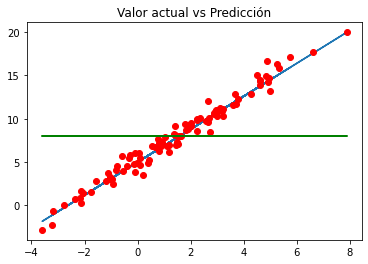

In [43]:
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'],'ro')
plt.plot(data['x'],y_mean,'g')
plt.title('Valor actual vs Predicción')

In [51]:
data['SSR'] = (data['y_prediccion'] -  y_mean) ** 2
data['SSD'] = (data['y_prediccion'] - data['y_actual']) ** 2
data['SST'] = (data['y_actual'] - y_mean) ** 2

In [52]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.693705,10.073021,10.118040,4.330971,0.002027,4.145619
1,2.953299,10.992500,10.611268,6.627156,0.145338,8.735328
2,-0.965128,3.020433,3.166257,23.723574,0.021265,25.165359
3,-1.554608,2.809157,2.046244,35.888459,0.582036,27.329736
4,-2.059969,1.434399,1.086060,48.314761,0.121340,43.593567


In [53]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])
print(SSR)
print(SSD)
print(SST)

1957.3516429495282
59.771358324923895
2088.768236793409


In [54]:
SSR + SSD #tendría que ser igual a SST

2017.1230012744522

In [55]:
R2 = SSR/SST
R2

0.9370841668649529

(array([ 2.,  2.,  6., 16., 21., 27., 12.,  9.,  3.,  2.]),
 array([-2.34521562, -1.92397136, -1.50272711, -1.08148285, -0.66023859,
        -0.23899434,  0.18224992,  0.60349418,  1.02473843,  1.44598269,
         1.86722695]),
 <a list of 10 Patch objects>)

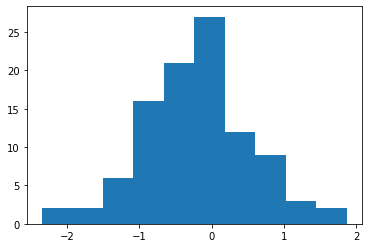

In [57]:
plt.hist(data['y_prediccion'] - data['y_actual'])